In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("Data/fraudTrain.csv")
df = df.drop('Unnamed: 0',axis = 1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract additional time features
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.dayofweek
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_year'] = df['trans_date_trans_time'].dt.year

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [5]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day,trans_month,trans_year
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1,2019
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1,2019
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1,2019
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1,2019
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1,2019


## Features to be Removed

1. **Trans_date_trans_time**: 
   - This feature has been split into month, year, day, and hour. 
   - From the EDA, it was observed that the hour at which the transactions happen plays a significant role.

2. **Cc_num**: 
   - While this could be useful in cases where we have built up history on a particular client (e.g., for anomaly detection or clustering to ensure against fraudulent activity), this feature is not needed in this context.

3. **First, Last, and Gender**: 
   - These features should be removed for ethical reasons to avoid introducing discrimination based on gender (male and female).

4. **Street, State, City, and Zipcode**: 
   - These are not needed since we have longitude and latitude data, which is more precise and also better for maintaining privacy.

5. **Trans_num**: 
   - This feature is not needed because it is just a unique label.

6. **DoB**: 
   - This feature will be converted to generation categories.


In [6]:
columns_to_drop = [
    'trans_date_trans_time', 
    'cc_num', 
    'first', 
    'last', 
    'gender', 
    'street', 
    'city', 
    'state', 
    'zip', 
    'trans_num', 
    'dob',
    'trans_year'
]

# Drop the columns
df_new = df.drop(columns=columns_to_drop)

In [7]:
# Verify the changes
print(df_new.columns)

Index(['merchant', 'category', 'amt', 'lat', 'long', 'city_pop', 'job',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day', 'trans_month'],
      dtype='object')


#### Preprocessing.

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   merchant     1296675 non-null  object 
 1   category     1296675 non-null  object 
 2   amt          1296675 non-null  float64
 3   lat          1296675 non-null  float64
 4   long         1296675 non-null  float64
 5   city_pop     1296675 non-null  int64  
 6   job          1296675 non-null  object 
 7   unix_time    1296675 non-null  int64  
 8   merch_lat    1296675 non-null  float64
 9   merch_long   1296675 non-null  float64
 10  is_fraud     1296675 non-null  int64  
 11  trans_hour   1296675 non-null  int32  
 12  trans_day    1296675 non-null  int32  
 13  trans_month  1296675 non-null  int32  
dtypes: float64(5), int32(3), int64(3), object(3)
memory usage: 123.7+ MB


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin

Splitting to train test

In [23]:
# Define the target and features
X = df_new.drop('is_fraud', axis=1)
y = df_new['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
X_train.head()

,merchant,category,amt,lat,long,city_pop,job,unix_time,merch_lat,merch_long,trans_hour,trans_day,trans_month
509059,"fraud_Stokes, Christiansen and Sipes",grocery_net,51.71,44.6087,-74.9732,69,Chief Executive Officer,1344482007,44.785928,-74.659301,3,4,8
395295,fraud_Effertz LLC,entertainment,13.78,31.9290,-97.6443,2526,Phytotherapist,1340999808,31.414028,-98.152203,19,5,6
536531,fraud_Kris-Padberg,shopping_pos,961.26,48.3400,-122.3456,85,"Research officer, political party",1345300940,49.118546,-122.622065,14,6,8
271001,fraud_Ratke and Sons,health_fitness,43.68,40.0235,-120.7986,128,Education administrator,1336944466,39.528098,-121.059990,21,0,5
532788,fraud_Upton PLC,entertainment,33.08,38.3511,-91.4867,6703,Naval architect,1345212941,39.213785,-92.188153,14,5,8


In [25]:
X.shape, y.shape

((1296675, 13), (1296675,))

In [26]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [29]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {}
        
    def fit(self, X, y=None):
        for column in X.columns:
            le = LabelEncoder()
            le.fit(X[column])
            self.label_encoders[column] = le
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        for column, le in self.label_encoders.items():
            X_transformed[column] = le.transform(X[column])
        return X_transformed

In [31]:
numeric_transformer = StandardScaler()
oh_transformer = CustomLabelEncoder()

- I need to label encode merchant, category and job.
- All the numerical data needs to be Scaled 

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', oh_transformer, categorical_columns),
        ('num', numeric_transformer, numerical_columns)
    ],
    remainder='passthrough'
)

In [33]:
transformed_train = preprocessor.fit_transform(X_train)

In [35]:
transformed_test = preprocessor.transform(X_test)

### Model selection before modifying the minority group.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9937
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.99      1.00      1.00    257834
       Fraud       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



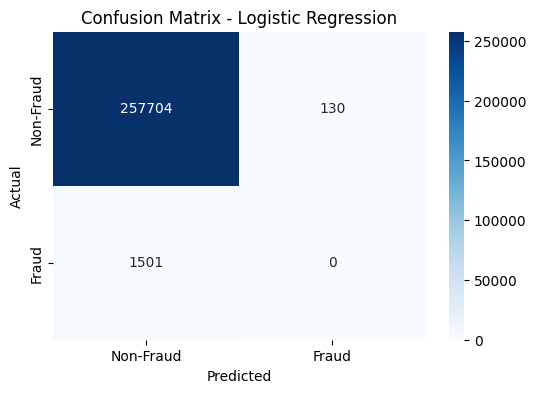

Model: K-Nearest Neighbors
Accuracy: 0.9942
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       0.99      1.00      1.00    257834
       Fraud       0.42      0.02      0.04      1501

    accuracy                           0.99    259335
   macro avg       0.71      0.51      0.52    259335
weighted avg       0.99      0.99      0.99    259335



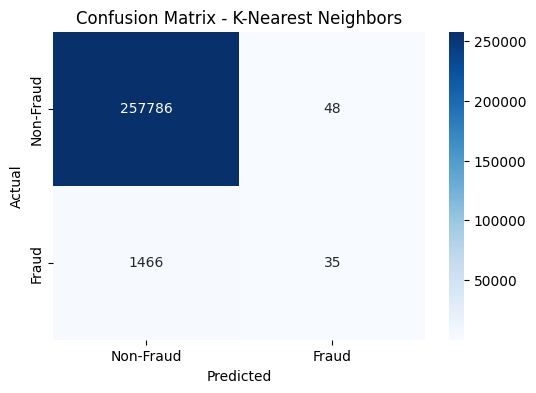

Model: Decision Tree
Accuracy: 0.9968
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.72      0.74      0.73      1501

    accuracy                           1.00    259335
   macro avg       0.86      0.87      0.86    259335
weighted avg       1.00      1.00      1.00    259335



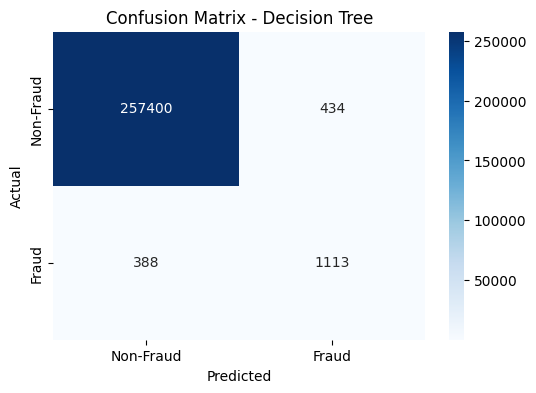

Model: Random Forest
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.94      0.69      0.80      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.85      0.90    259335
weighted avg       1.00      1.00      1.00    259335



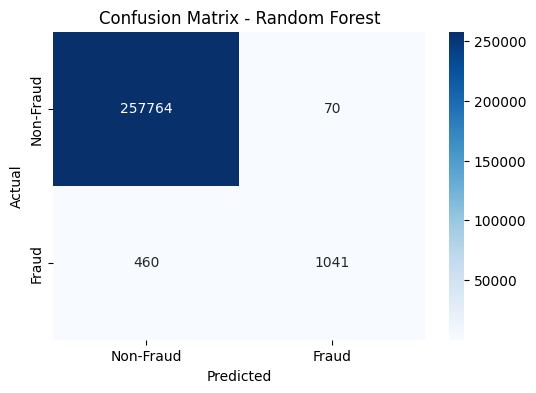

Model: AdaBoost
Accuracy: 0.9958
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.75      0.42      0.54      1501

    accuracy                           1.00    259335
   macro avg       0.87      0.71      0.77    259335
weighted avg       1.00      1.00      1.00    259335



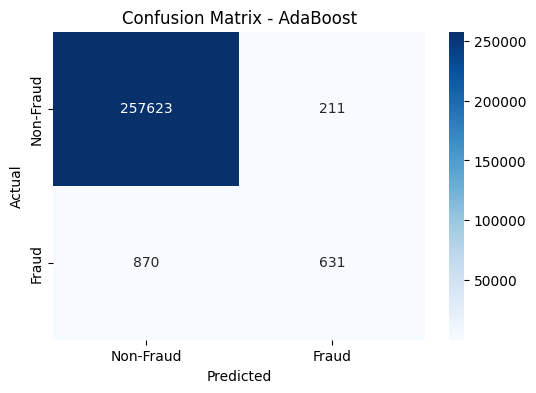

Model: Support Vector Machine
Accuracy: 0.9942
Classification Report:


C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

              precision    recall  f1-score   support

   Non-Fraud       0.99      1.00      1.00    257834
       Fraud       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



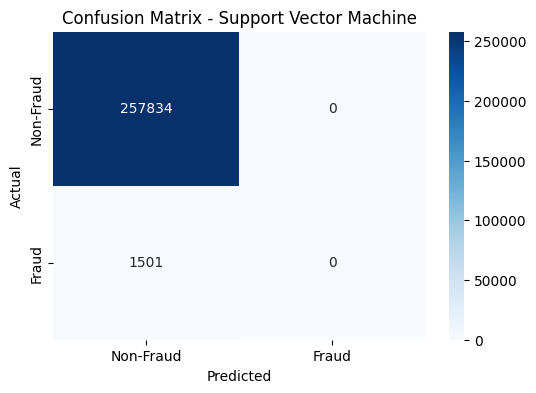

Model: XGBoost
Accuracy: 0.9983
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.92      0.77      0.84      1501

    accuracy                           1.00    259335
   macro avg       0.96      0.88      0.92    259335
weighted avg       1.00      1.00      1.00    259335



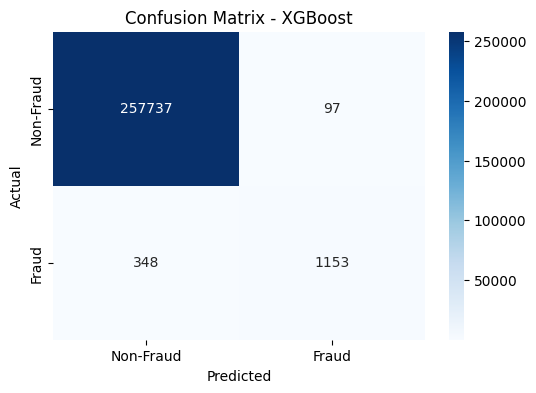

Model: CatBoost
Accuracy: 0.9982
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.91      0.76      0.83      1501

    accuracy                           1.00    259335
   macro avg       0.96      0.88      0.91    259335
weighted avg       1.00      1.00      1.00    259335



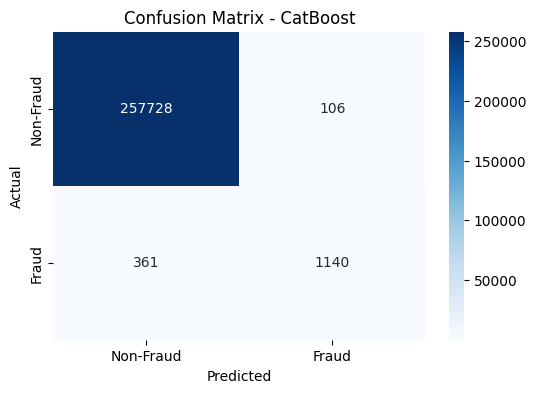

In [43]:
for name, model in models.items():
    model.fit(transformed_train, y_train)
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

##### Since I will be catering more to recall with a Good F1
- Logistic Reg because its less complex.
- Decision tree because of it interpreability but can overfit
- RF, XGBoost, CatBoost

I will be testing this 5 models with SMOTE and see which one bring the best result. 

In [45]:
smote = SMOTE(sampling_strategy=0.8)
X_train_nm, y_train_nm = smote.fit_resample(transformed_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 1031335, 1: 6005})
Resampled dataset shape Counter({0: 1031335, 1: 825068})


In [48]:
import time
models_v1 = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Time: 14.0462 seconds
Accuracy: 0.9593
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.96      0.98    257834
       Fraud       0.10      0.76      0.18      1501

    accuracy                           0.96    259335
   macro avg       0.55      0.86      0.58    259335
weighted avg       0.99      0.96      0.97    259335



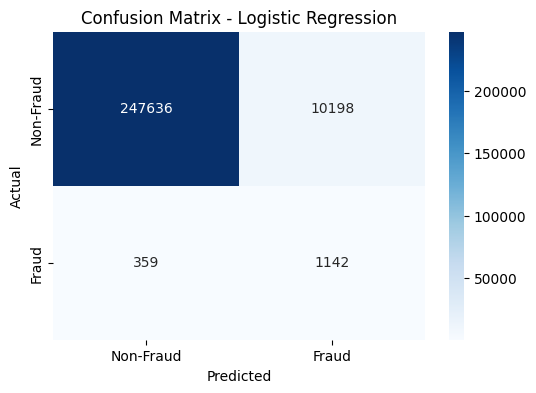

Model: Decision Tree
Training Time: 132.1127 seconds
Accuracy: 0.9952
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.57      0.74      0.64      1501

    accuracy                           1.00    259335
   macro avg       0.78      0.87      0.82    259335
weighted avg       1.00      1.00      1.00    259335



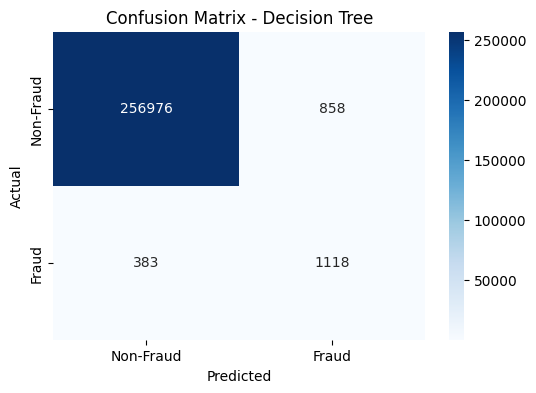

Model: Random Forest
Training Time: 3262.2358 seconds
Accuracy: 0.9969
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.72      0.76      0.74      1501

    accuracy                           1.00    259335
   macro avg       0.86      0.88      0.87    259335
weighted avg       1.00      1.00      1.00    259335



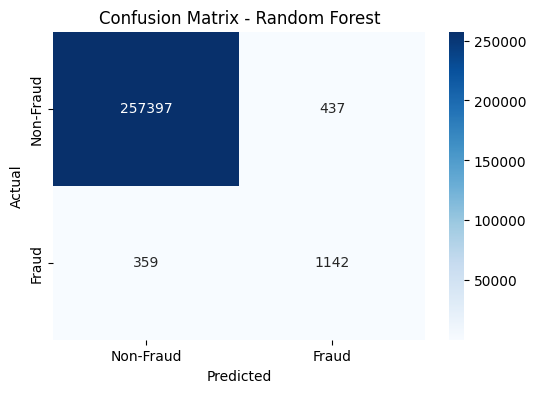

Model: XGBoost
Training Time: 14.6375 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.85      0.78      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.89      0.91    259335
weighted avg       1.00      1.00      1.00    259335



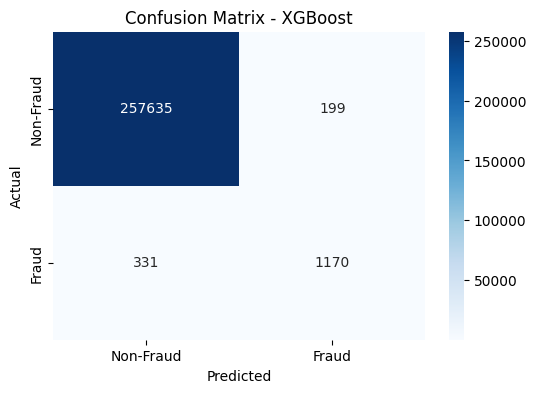

Model: CatBoost
Training Time: 448.8385 seconds
Accuracy: 0.9978
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.86      0.75      0.80      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335



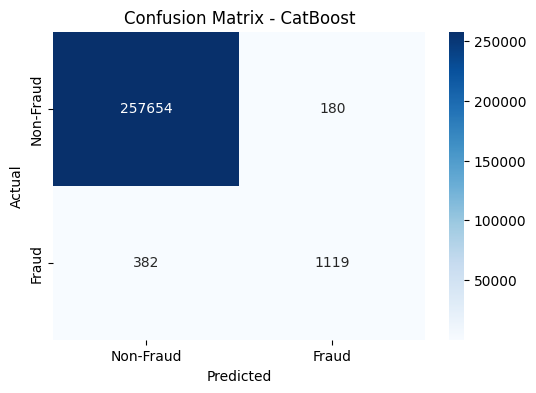

In [49]:
for name, model in models_v1.items():
    start_time = time.time()  # Record the start time
    model.fit(X_train_nm, y_train_nm)
    end_time = time.time()  # Record the end time
    
    training_time = end_time - start_time  # Calculate the training duration
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")  # Output the training time
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

- So I just noticed just overly sampling the minority doesn't just improve the results not, I would be trying diffrent rations and also SMOTE, SMOTETomek or also oversampling 

In [51]:
smote_02 = SMOTE(sampling_strategy=0.2)
X_train_nm, y_train_nm = smote_02.fit_resample(transformed_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 1031335, 1: 6005})
Resampled dataset shape Counter({0: 1031335, 1: 206267})


In [52]:
import time
models_v2 = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Time: 9.0505 seconds
Accuracy: 0.9853
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.99      0.99    257834
       Fraud       0.21      0.57      0.31      1501

    accuracy                           0.99    259335
   macro avg       0.61      0.78      0.65    259335
weighted avg       0.99      0.99      0.99    259335



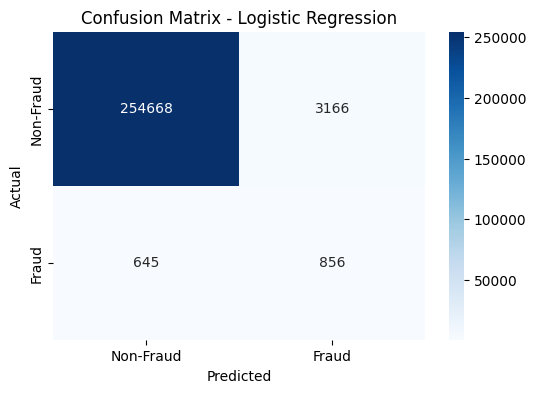

Model: Decision Tree
Training Time: 69.3369 seconds
Accuracy: 0.9956
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.59      0.75      0.66      1501

    accuracy                           1.00    259335
   macro avg       0.80      0.87      0.83    259335
weighted avg       1.00      1.00      1.00    259335



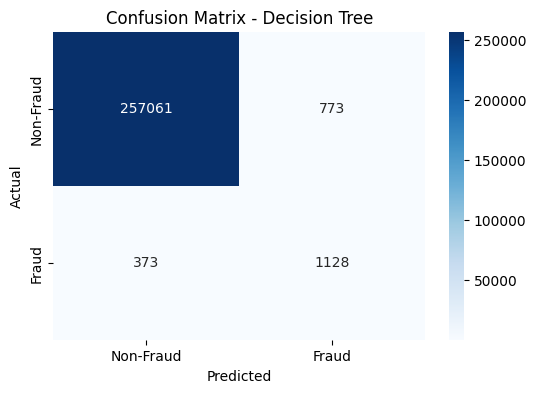

Model: Random Forest
Training Time: 1600.9854 seconds
Accuracy: 0.9974
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.77      0.77      0.77      1501

    accuracy                           1.00    259335
   macro avg       0.89      0.88      0.88    259335
weighted avg       1.00      1.00      1.00    259335



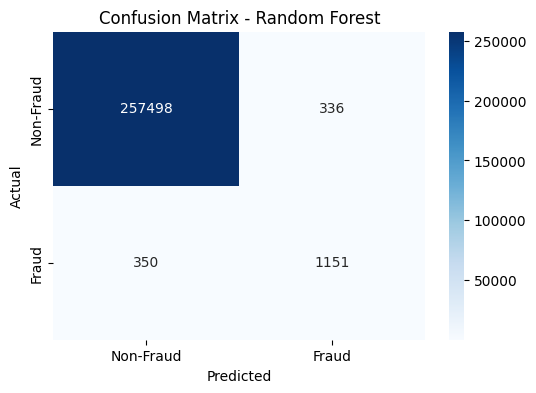

Model: XGBoost
Training Time: 23.3568 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.87      0.77      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.88      0.91    259335
weighted avg       1.00      1.00      1.00    259335



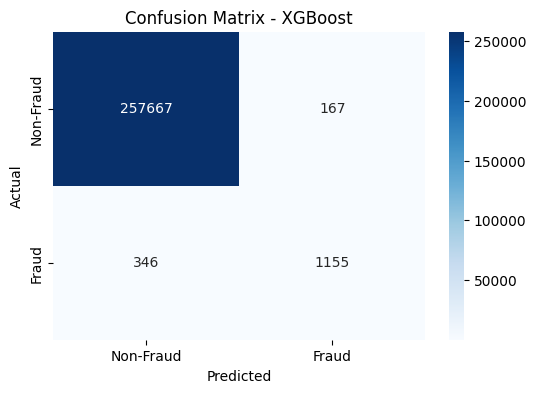

Model: CatBoost
Training Time: 373.2954 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.90      0.74      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.95      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335



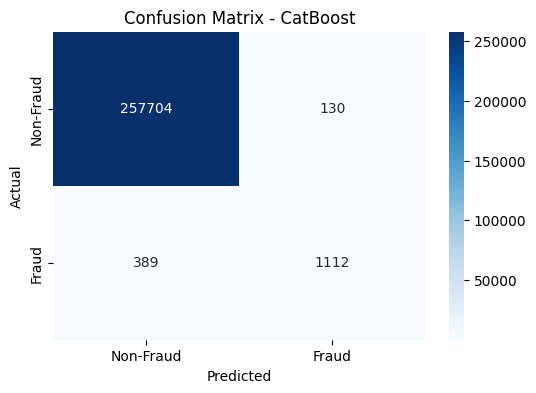

In [53]:
for name, model in models_v2.items():
    start_time = time.time()  # Record the start time
    model.fit(X_train_nm, y_train_nm)
    end_time = time.time()  # Record the end time
    
    training_time = end_time - start_time  # Calculate the training duration
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")  # Output the training time
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [54]:
smote_04 = SMOTE(sampling_strategy=0.4)
X_train_nm, y_train_nm = smote_04.fit_resample(transformed_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 1031335, 1: 6005})
Resampled dataset shape Counter({0: 1031335, 1: 412534})


In [55]:
import time
models_v2 = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Time: 9.1354 seconds
Accuracy: 0.9789
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    257834
       Fraud       0.18      0.72      0.28      1501

    accuracy                           0.98    259335
   macro avg       0.59      0.85      0.64    259335
weighted avg       0.99      0.98      0.99    259335



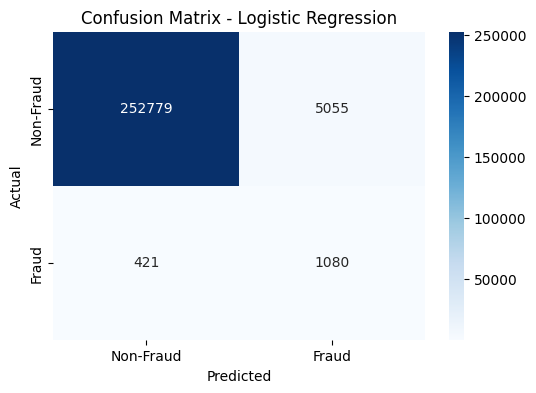

Model: Decision Tree
Training Time: 68.4007 seconds
Accuracy: 0.9953
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.57      0.74      0.64      1501

    accuracy                           1.00    259335
   macro avg       0.78      0.87      0.82    259335
weighted avg       1.00      1.00      1.00    259335



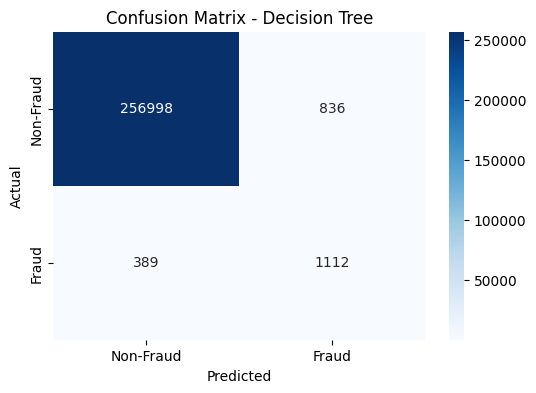

Model: Random Forest
Training Time: 3704.8248 seconds
Accuracy: 0.9971
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.75      0.76      0.75      1501

    accuracy                           1.00    259335
   macro avg       0.87      0.88      0.88    259335
weighted avg       1.00      1.00      1.00    259335



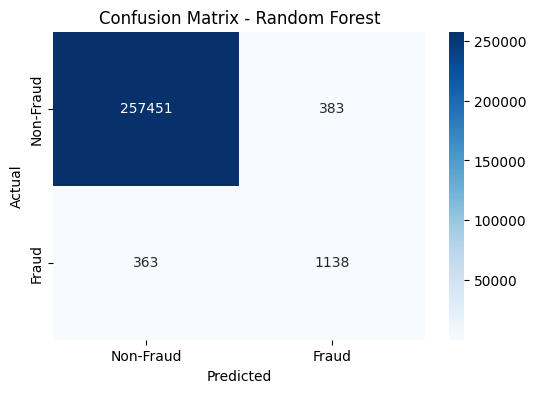

Model: XGBoost
Training Time: 8.7664 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.87      0.78      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.89      0.91    259335
weighted avg       1.00      1.00      1.00    259335



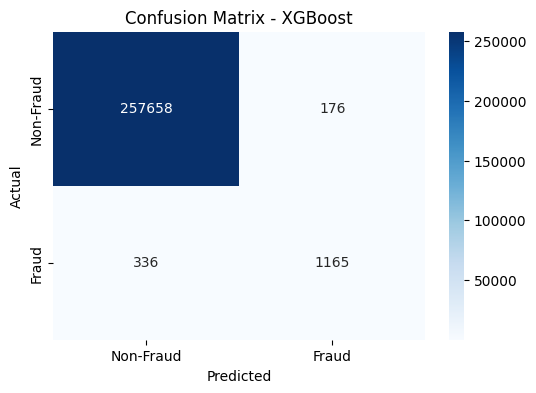

Model: CatBoost
Training Time: 167.3488 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.88      0.75      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335



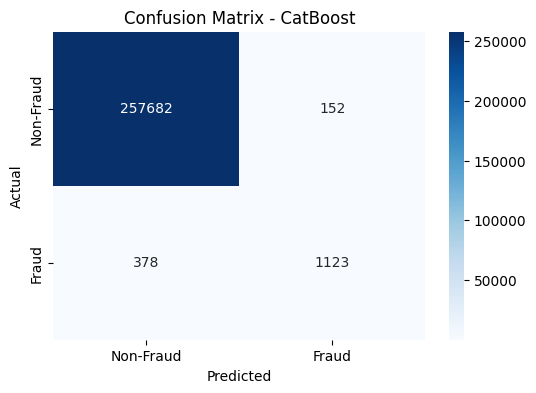

In [56]:
for name, model in models_v2.items():
    start_time = time.time()  # Record the start time
    model.fit(X_train_nm, y_train_nm)
    end_time = time.time()  # Record the end time
    
    training_time = end_time - start_time  # Calculate the training duration
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")  # Output the training time
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [57]:
smote_03 = SMOTE(sampling_strategy=0.3)
X_train_nm, y_train_nm = smote_04.fit_resample(transformed_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 1031335, 1: 6005})
Resampled dataset shape Counter({0: 1031335, 1: 412534})


In [58]:
import time
models_v2 = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Time: 9.4127 seconds
Accuracy: 0.9791
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    257834
       Fraud       0.18      0.73      0.29      1501

    accuracy                           0.98    259335
   macro avg       0.59      0.85      0.64    259335
weighted avg       0.99      0.98      0.99    259335



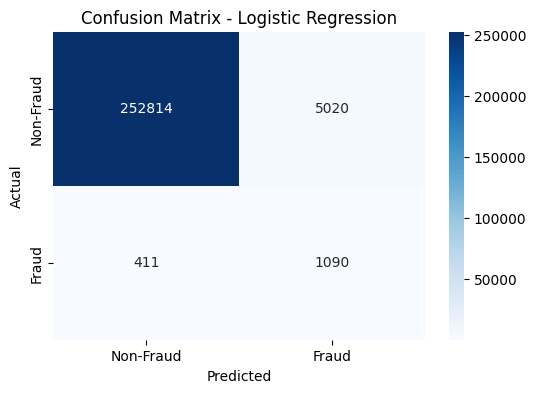

Model: Decision Tree
Training Time: 99.4680 seconds
Accuracy: 0.9954
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.58      0.74      0.65      1501

    accuracy                           1.00    259335
   macro avg       0.79      0.87      0.82    259335
weighted avg       1.00      1.00      1.00    259335



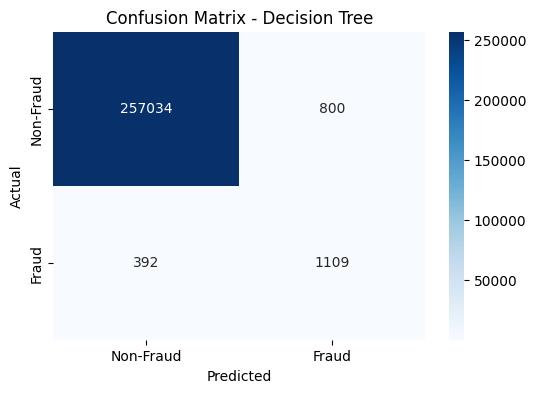

Model: Random Forest
Training Time: 1838.8453 seconds
Accuracy: 0.9971
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.74      0.76      0.75      1501

    accuracy                           1.00    259335
   macro avg       0.87      0.88      0.87    259335
weighted avg       1.00      1.00      1.00    259335



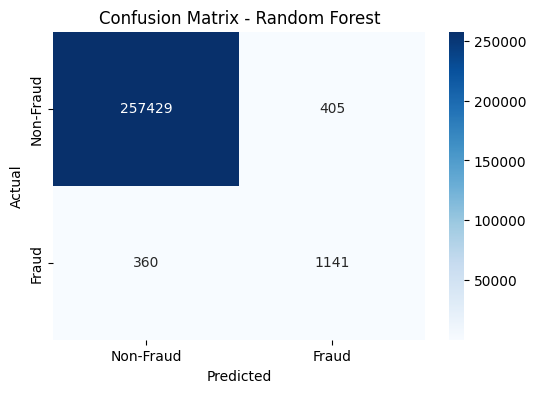

Model: XGBoost
Training Time: 8.1779 seconds
Accuracy: 0.9979
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.86      0.77      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.88      0.90    259335
weighted avg       1.00      1.00      1.00    259335



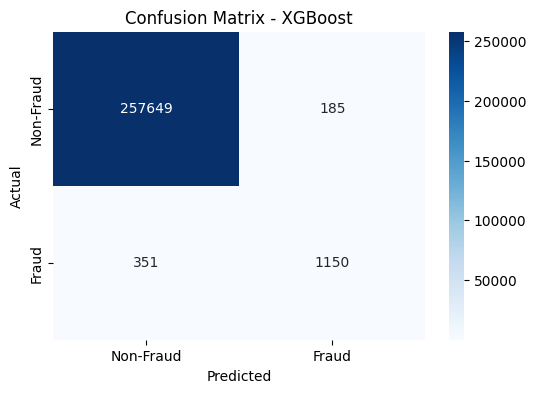

Model: CatBoost
Training Time: 158.9392 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.88      0.75      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335



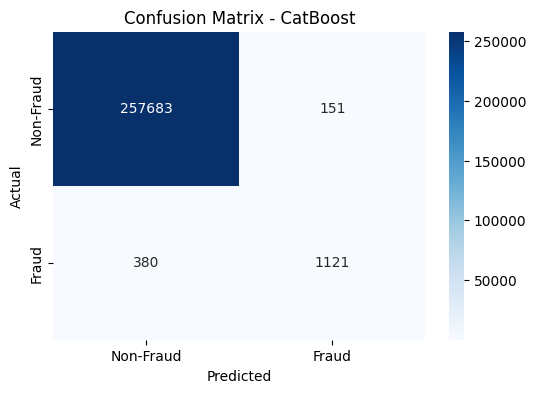

In [59]:
for name, model in models_v2.items():
    start_time = time.time()  # Record the start time
    model.fit(X_train_nm, y_train_nm)
    end_time = time.time()  # Record the end time
    
    training_time = end_time - start_time  # Calculate the training duration
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")  # Output the training time
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [60]:
smote_05 = SMOTE(sampling_strategy=0.5)
X_train_nm, y_train_nm = smote_04.fit_resample(transformed_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

Original dataset shape Counter({0: 1031335, 1: 6005})
Resampled dataset shape Counter({0: 1031335, 1: 412534})


In [61]:
import time
models_v2 = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Time: 11.6262 seconds
Accuracy: 0.9791
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    257834
       Fraud       0.18      0.72      0.29      1501

    accuracy                           0.98    259335
   macro avg       0.59      0.85      0.64    259335
weighted avg       0.99      0.98      0.99    259335



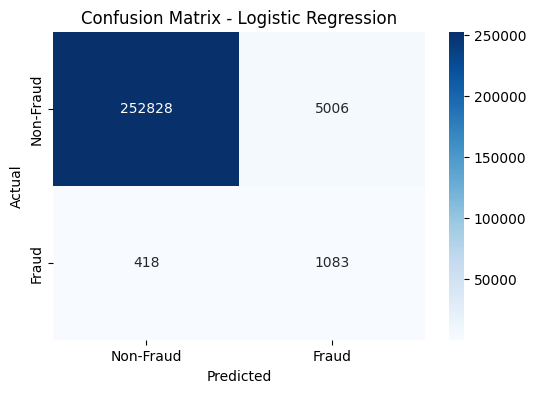

Model: Decision Tree
Training Time: 63.1131 seconds
Accuracy: 0.9954
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.58      0.74      0.65      1501

    accuracy                           1.00    259335
   macro avg       0.79      0.87      0.82    259335
weighted avg       1.00      1.00      1.00    259335



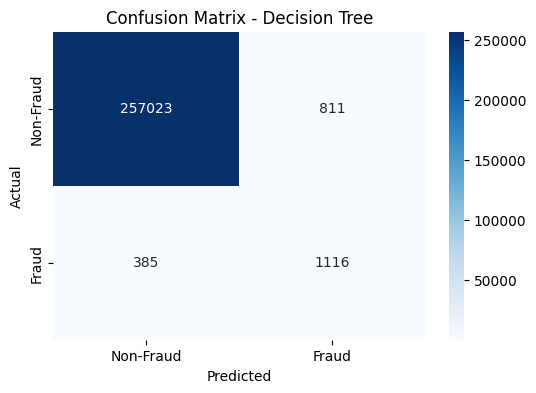

Model: Random Forest
Training Time: 1462.3223 seconds
Accuracy: 0.9972
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.75      0.76      0.76      1501

    accuracy                           1.00    259335
   macro avg       0.88      0.88      0.88    259335
weighted avg       1.00      1.00      1.00    259335



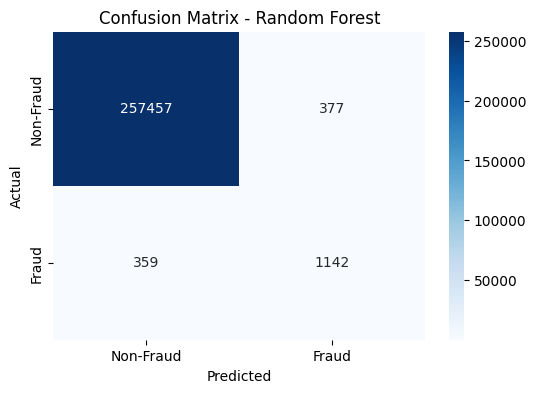

Model: XGBoost
Training Time: 10.8678 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.87      0.77      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.89      0.91    259335
weighted avg       1.00      1.00      1.00    259335



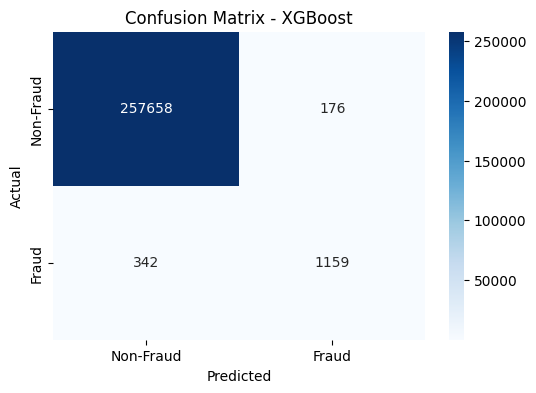

Model: CatBoost
Training Time: 269.9850 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.89      0.75      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.87      0.91    259335
weighted avg       1.00      1.00      1.00    259335



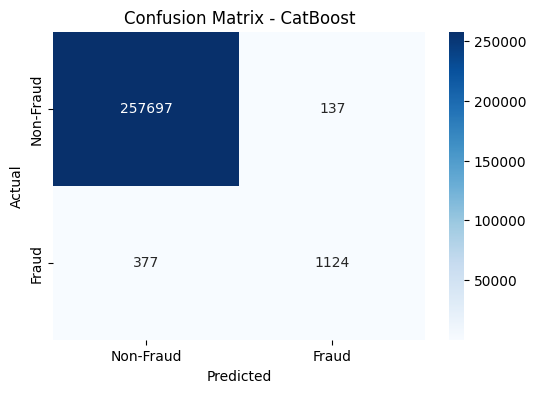

In [62]:
for name, model in models_v2.items():
    start_time = time.time()  # Record the start time
    model.fit(X_train_nm, y_train_nm)
    end_time = time.time()  # Record the end time
    
    training_time = end_time - start_time  # Calculate the training duration
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")  # Output the training time
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

- Pre SMOTE is still giving the best result so far. I am going to try SMOTETomek since it deals with boundaries 

In [63]:
from imblearn.combine import SMOTETomek

In [64]:
tomek_03 = SMOTETomek(sampling_strategy=0.3, n_jobs = -1)
X_train_nm, y_train_nm = tomek_03.fit_resample(transformed_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Original dataset shape Counter({0: 1031335, 1: 6005})
Resampled dataset shape Counter({0: 1031295, 1: 309360})


C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Time: 18.3581 seconds
Accuracy: 0.9822
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    257834
       Fraud       0.20      0.67      0.30      1501

    accuracy                           0.98    259335
   macro avg       0.60      0.83      0.65    259335
weighted avg       0.99      0.98      0.99    259335



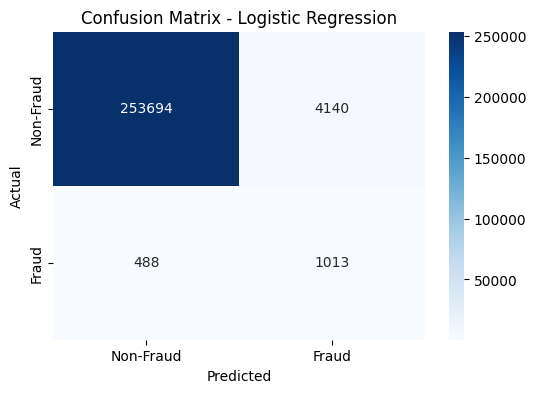

Model: Decision Tree
Training Time: 79.8850 seconds
Accuracy: 0.9956
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.60      0.74      0.66      1501

    accuracy                           1.00    259335
   macro avg       0.80      0.87      0.83    259335
weighted avg       1.00      1.00      1.00    259335



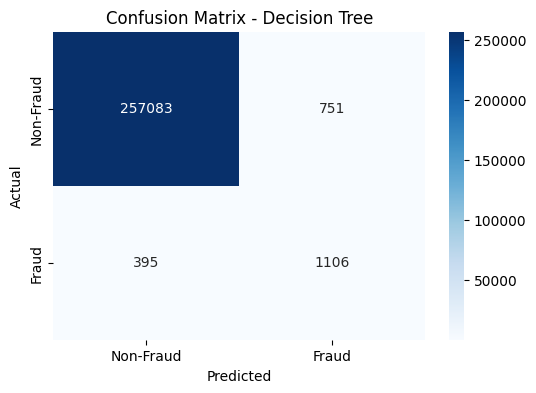

Model: Random Forest
Training Time: 1915.8351 seconds
Accuracy: 0.9971
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.75      0.76      0.75      1501

    accuracy                           1.00    259335
   macro avg       0.87      0.88      0.88    259335
weighted avg       1.00      1.00      1.00    259335



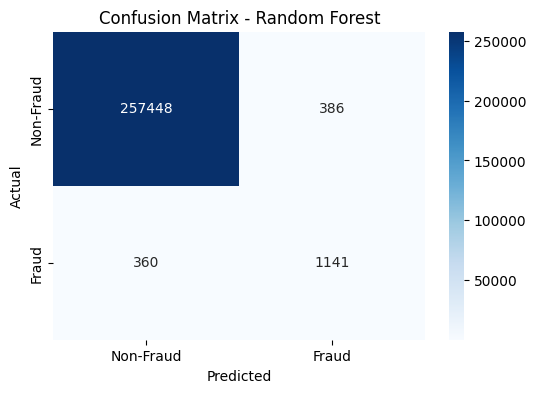

Model: XGBoost
Training Time: 12.3218 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.87      0.77      0.82      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.88      0.91    259335
weighted avg       1.00      1.00      1.00    259335



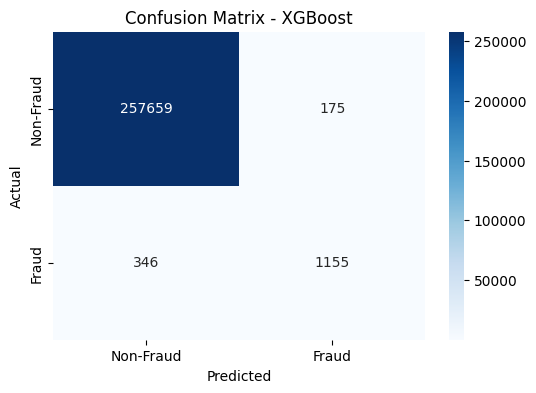

Model: CatBoost
Training Time: 204.6449 seconds
Accuracy: 0.9980
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.89      0.74      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335



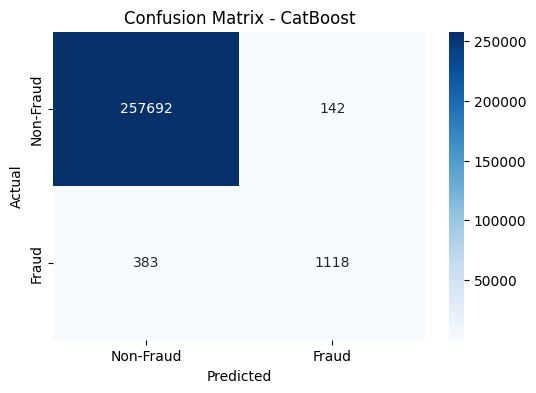

In [65]:
for name, model in models_v2.items():
    start_time = time.time()  # Record the start time
    model.fit(X_train_nm, y_train_nm)
    end_time = time.time()  # Record the end time
    
    training_time = end_time - start_time  # Calculate the training duration
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")  # Output the training time
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [66]:
tomek_08 = SMOTETomek(sampling_strategy=0.8, n_jobs = -1)
X_train_nm, y_train_nm = tomek_08.fit_resample(transformed_train, y_train)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_nm)))

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Original dataset shape Counter({0: 1031335, 1: 6005})
Resampled dataset shape Counter({0: 1031333, 1: 825066})


C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Training Time: 14.6229 seconds
Accuracy: 0.9594
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.96      0.98    257834
       Fraud       0.10      0.76      0.18      1501

    accuracy                           0.96    259335
   macro avg       0.55      0.86      0.58    259335
weighted avg       0.99      0.96      0.97    259335



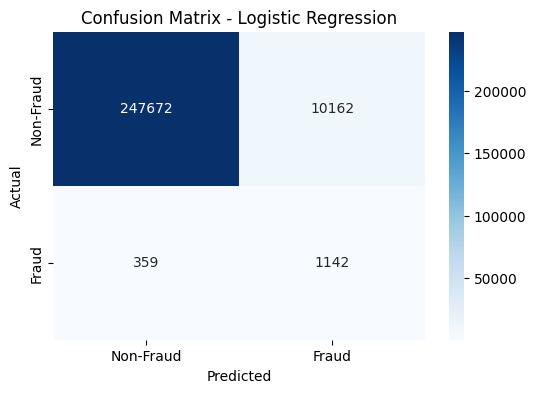

Model: Decision Tree
Training Time: 141.3943 seconds
Accuracy: 0.9951
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.56      0.73      0.64      1501

    accuracy                           1.00    259335
   macro avg       0.78      0.87      0.82    259335
weighted avg       1.00      1.00      1.00    259335



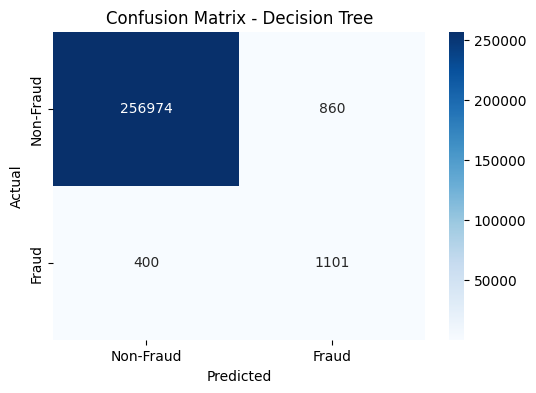

Model: Random Forest
Training Time: 4466.0270 seconds
Accuracy: 0.9970
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.73      0.76      0.74      1501

    accuracy                           1.00    259335
   macro avg       0.86      0.88      0.87    259335
weighted avg       1.00      1.00      1.00    259335



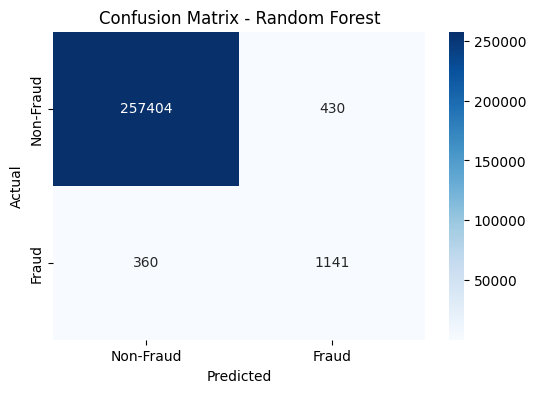

Model: XGBoost
Training Time: 18.7548 seconds
Accuracy: 0.9979
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.85      0.77      0.81      1501

    accuracy                           1.00    259335
   macro avg       0.92      0.89      0.90    259335
weighted avg       1.00      1.00      1.00    259335



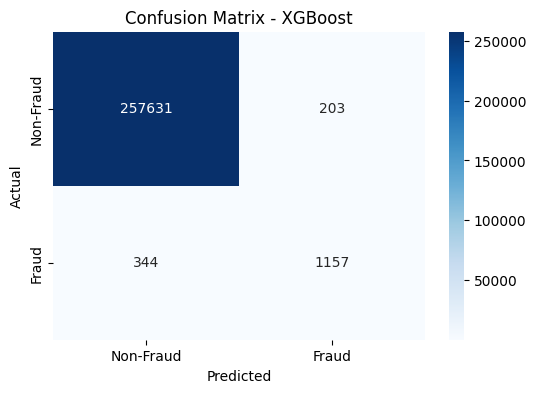

Model: CatBoost
Training Time: 291.1542 seconds
Accuracy: 0.9979
Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    257834
       Fraud       0.87      0.74      0.80      1501

    accuracy                           1.00    259335
   macro avg       0.93      0.87      0.90    259335
weighted avg       1.00      1.00      1.00    259335



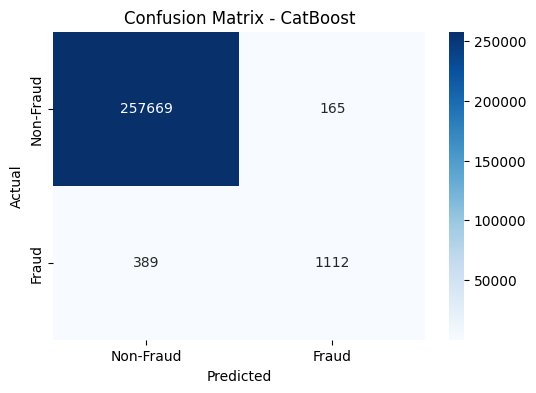

In [67]:
for name, model in models_v2.items():
    start_time = time.time()  # Record the start time
    model.fit(X_train_nm, y_train_nm)
    end_time = time.time()  # Record the end time
    
    training_time = end_time - start_time  # Calculate the training duration
    y_pred = model.predict(transformed_test)
    
    print(f"Model: {name}")
    print(f"Training Time: {training_time:.4f} seconds")  # Output the training time
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

- I am not really satisfied with the results I am getting so I will be building a NN. 

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [70]:
model = Sequential([
    Dense(64, input_dim=transformed_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [81]:
def plot_training_history(model, X_train, y_train, X_test, y_test):
    """
    Train the model and plot training and validation loss, training and validation accuracy.

    Parameters:
    - model: The Keras model to be trained.
    - X_train, y_train: Training data.
    - X_test, y_test: Testing data.

    Returns:
    - last_epoch_results: Dictionary containing the last epoch's loss and accuracy for training and validation.
    """

    # Get the number of epochs as user input
    epochs = int(input("Enter the number of epochs: "))

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),verbose=0)

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Adjust layout for better visualization
    plt.tight_layout()

    # Show the plots
    plt.show()

    # Extract last epoch results
    last_epoch_results = {
        'last_epoch_train_loss': history.history['loss'][-1],
        'last_epoch_val_loss': history.history['val_loss'][-1],
        'last_epoch_train_accuracy': history.history['accuracy'][-1],
        'last_epoch_val_accuracy': history.history['val_accuracy'][-1],
    }

    # Print last epoch metrics
    print("\nLast Epoch Metrics:")
    print(f"Train Loss: {last_epoch_results['last_epoch_train_loss']:.4f}")
    print(f"Validation Loss: {last_epoch_results['last_epoch_val_loss']:.4f}")
    print(f"Train Accuracy: {last_epoch_results['last_epoch_train_accuracy']:.4f}")
    print(f"Validation Accuracy: {last_epoch_results['last_epoch_val_accuracy']:.4f}")

    return last_epoch_results, model.summary()

Enter the number of epochs:  5


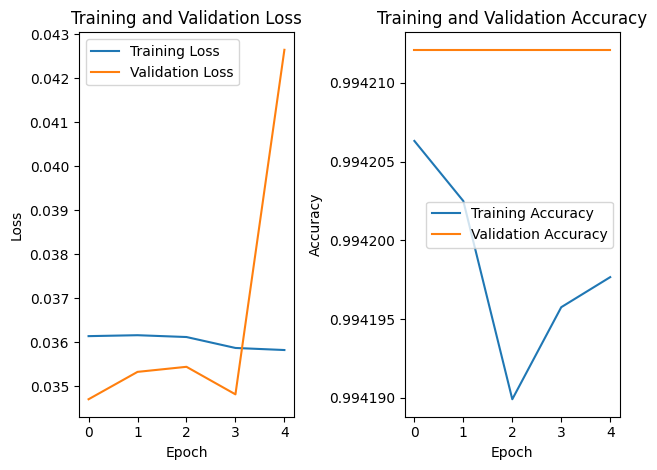


Last Epoch Metrics:
Train Loss: 0.0358
Validation Loss: 0.0426
Train Accuracy: 0.9942
Validation Accuracy: 0.9942
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
       

({'last_epoch_train_loss': 0.03582586720585823,
  'last_epoch_val_loss': 0.04264753684401512,
  'last_epoch_train_accuracy': 0.99419766664505,
  'last_epoch_val_accuracy': 0.9942120909690857},
 None)

In [83]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

plot_training_history(model, transformed_train, y_train, transformed_test, y_test)

In [84]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test, threshold=0.5):
    # Predictions on the training set
    y_train_pred_probs = model.predict(X_train)
    y_train_pred = (y_train_pred_probs > threshold).astype(int)

    # Evaluate the performance on the training set
    accuracy_train = accuracy_score(y_train, y_train_pred)
    classification_report_train = classification_report(y_train, y_train_pred)
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    print(f'Training Accuracy: {accuracy_train:.2f}')
    print('Classification Report for Training Set:')
    print(classification_report_train)
    print('Confusion Matrix for Training Set:')
    print(confusion_matrix_train)

    # Predictions on the test set
    y_test_pred_probs = model.predict(X_test)
    y_test_pred = (y_test_pred_probs > threshold).astype(int)

    # Evaluate the performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    classification_report_test = classification_report(y_test, y_test_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

    print(f'Test Accuracy: {accuracy_test:.2f}')
    print('Classification Report for Test Set:')
    print(classification_report_test)
    print('Confusion Matrix for Test Set:')
    print(confusion_matrix_test)

# Usage
evaluate_model_performance(model, transformed_train, y_train, transformed_test, y_test)

C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Training Accuracy: 0.99
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1031335
           1       0.00      0.00      0.00      6005

    accuracy                           0.99   1037340
   macro avg       0.50      0.50      0.50   1037340
weighted avg       0.99      0.99      0.99   1037340

Confusion Matrix for Training Set:
[[1031335       0]
 [   6005       0]]


C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.99
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix for Test Set:
[[257834      0]
 [  1501      0]]


C:\Users\mayuo\anaconda3\envs\just_deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
plot_training_history(model, X_train_nm, y_train_nm, transformed_test, y_test)

Enter the number of epochs:  50



KeyboardInterrupt

